### 1.

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

In [2]:
class poission_gamma_model:   
    
    def __init__(self, a, b, theta, n, sum_y):
        
        self.a = a
        self.b = b
        self.theta = theta
        self.n = n
        self.sum_y = sum_y
    
    def prior(self):
        
        return st.gamma(self.a,scale =  1/ self.b)
    
    def likelihood(self):
        
        return 10**(-74) * self.theta**self.sum_y * np.exp(- self.n * self.theta)
    
    def post(self):
        
        return st.gamma(self.a + self.sum_y,  scale = 1/ (self.b + self.n))
    
    def postmean(self):
        
        return (self.a + self.sum_y)/ (self.b + self.n)
    
    def postpred(self, newdata):
        
        return st.nbinom.pmf(newdata, self.a + self.sum_y, (self.b + self.n) / (self.b + self.n + 1))
    
    def plotting(self, plot_title):
        
        plt.figure(figsize=(8, 6))
        plt.style.use('ggplot')
        plt.plot(self.theta, self.prior().pdf(self.theta), label = 'Prior', c = 'blue')
        #plt.plot(self.theta, self.likelihood(), label='Likelihood', c= 'orange')
        plt.plot(self.theta, self.post().pdf(self.theta), label = 'Posterior', c = 'red')
        plt.xlabel(r'$\theta$', fontsize=14) ; plt.ylabel('Density', fontsize=16); plt.legend()
        plt.title(plot_title)

Group A

11.85


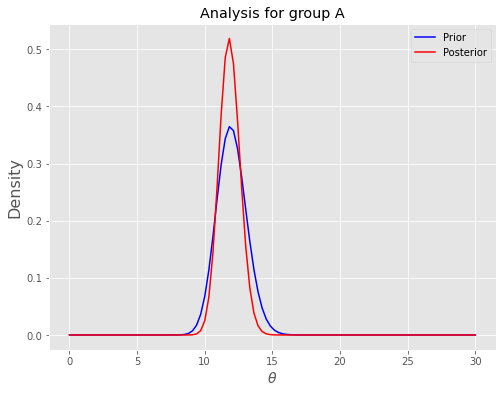

In [3]:
pgmodelA = poission_gamma_model(120, 10, np.linspace(0.01,30,100), 10, 117)
print(pgmodelA.postmean())

pgmodelA.plotting(plot_title = 'Analysis for group A')

Group B

8.928571428571429


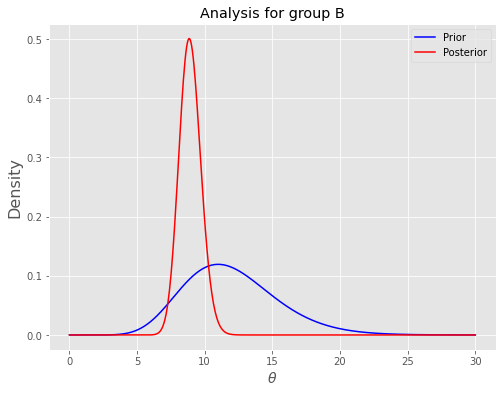

In [4]:
pgmodelB = poission_gamma_model(12, 1, np.linspace(0.01,30,500), 13,113)
print(pgmodelB.postmean())

pgmodelB.plotting(plot_title = 'Analysis for group B')

Posterior Predictive

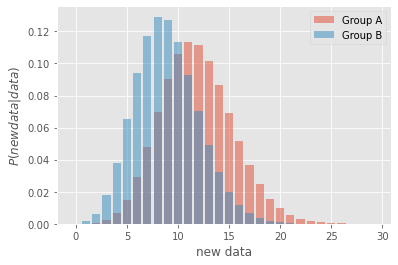

In [5]:
plt.bar(np.arange(30), pgmodelA.postpred(np.arange(30)), alpha = 0.5, label = 'Group A')
plt.bar(np.arange(30), pgmodelB.postpred(np.arange(30)), alpha = 0.5, label = 'Group B')
plt.xlabel('new data') ; plt.ylabel(r'$P(new data|data)$')
plt.legend()

### 2. Expressing Binomial likelihood in a form in exponential family.

likelihood : $\prod_{i=1}^{n} f(y | \theta) = \theta^{\sum y_i} (1 - \theta)^{n - \sum y_i} = exp(\sum y_i log \theta + (n - \sum y_i) log (1 - \theta)) = exp(\sum y_i log(\frac{\theta}{1-\theta}) + nlog(1-\theta))$

Let $\phi := log(\frac{\theta}{1-\theta})$ and $Y := \sum y_i$

$= exp(\theta Y) \cdot exp(\theta + 1)^{-n}$

### 3.


### 3.1 Proof that $Poi(\lambda) = lim_{r \rightarrow \infty} NB(r, \frac{r}{r + \lambda})$

Proof using the convergence of CDF.

Let $X \sim NB(r, \frac{r}{r + \lambda}).$ Then, the pmf $f(x) = $ $r -1 + x \choose x$ $(1 - \frac{\lambda}{r + \lambda})^r (\frac{\lambda}{r + \lambda})^x = \frac{\lambda^x}{x!} \cdot \frac{\prod_{k = r}^{r + x -1} k}{r + \lambda^x} \cdot \frac{1}{(1 + \frac{\lambda}{r})^r} = \frac{\lambda^x}{x!} e^{-\lambda}$



### 3.2

The poission dist'n has the same mean and variance while the negative binomial distribution is overdispersed : variance is bigger than mean.

$E(X) = \frac{pr}{1-p} = \lambda$.

$V(X) = \frac{pr}{(1-p)^2} > E(X)$



### 3.3 

Let $X \sim B(n,p)$ and $Y \sim Poi(\lambda), \lambda := np$. 

WTS) $lim_{n \rightarrow \infty} F_X(x) = F_Y (x) while $\lambda$ is fixed.

Proof by thm : Suppose $X_i$ is a sequence of RVs each with mgf $M_{X_i}(t)$. Suppose that $lim_{i \rightarrow \infty} M_{X_i} (t) = M_X (t), \forall t \in ngbd(0)$. Then, $lim_{i \rightarrow \infty} F_{x_i} (x) = F_X(x), \forall x$ where $F_X(x)$ is continuous.

$M_X(t) = (pe^t + (1-p))^n$

and $M_Y(t) = e^{\lambda (e^t - 1)}$.

$lim_{n \rightarrow \infty} M_X(t) = lim_{n \rightarrow \infty} (1 + \frac{np(e^t -1)}{n})^n = e^{\lambda(e^t -1)} = M_Y(t)$.